### Exploring the data from extraction

In [179]:
import pandas as pd
import sqlalchemy as alch
from getpass import getpass
import re
import datetime as dt


from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
#stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import csv from extraction notebook

In [180]:
df = pd.read_csv("data/queen-lyrics.csv")

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       194 non-null    object
 1   album_name        194 non-null    object
 2   album_link        194 non-null    object
 3   album_cover       194 non-null    object
 4   album_popularity  194 non-null    int64 
 5   release_date      194 non-null    object
 6   total_tracks      194 non-null    int64 
 7   tracks            194 non-null    object
 8   lyrics            138 non-null    object
dtypes: int64(2), object(7)
memory usage: 13.8+ KB


### Tranformation and Enrichment Process:
1. Drop NaNs
2. Replace paranthesis, brackets, line breaks, and tabs
3. Transform the column `release date` to datetime
4. Transform all words to lower case
5. Apply Stem Function to eliminate words suffixes. 
6. Apply Textblob polarity method to calculate lyrics sentiment
7. Assign category to lyrcs based on polarity

In [182]:
df.dropna(inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 190
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       138 non-null    object
 1   album_name        138 non-null    object
 2   album_link        138 non-null    object
 3   album_cover       138 non-null    object
 4   album_popularity  138 non-null    int64 
 5   release_date      138 non-null    object
 6   total_tracks      138 non-null    int64 
 7   tracks            138 non-null    object
 8   lyrics            138 non-null    object
dtypes: int64(2), object(7)
memory usage: 10.8+ KB


In [184]:
def little_cleaning_function (df):
    df["lyrics"] = df["lyrics"].str.replace(r"\(.+\)", "", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r"\[.+\]", "", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r"'", "`", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r'\n', " ", regex=True)
    df["lyrics"] = df["lyrics"].str.replace('    ', " ")
    df["lyrics"] = df["lyrics"].str.replace('   ', " ")
    df["lyrics"] = df["lyrics"].str.replace(r'[-|n]na[- | a]', " ", regex=True)  
    return df

In [185]:
little_cleaning_function (df)

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics
0,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Keep Yourself Alive,Keep Yourself Alive Lyrics Taking off I was to...
1,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Doing Alright,Suicide Sally & Johnny Guitar LyricsSuicide Sa...
2,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Great King Rat,Great King Rat Lyrics Great King Rat died tod...
5,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,The Night Comes Down,The Night Comes Down Lyrics When I was young ...
8,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Jesus,Jesus Lyrics And then I saw Him in the crowd A...
...,...,...,...,...,...,...,...,...,...
179,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Coming Soon,"Coming Soon Lyrics Uuuh, uuuh, uuuh Oh, o-ooh,..."
180,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Save Me,Save Me Lyrics It started off so well They sai...
183,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,Jealousy,"Jealousy Lyrics Oh, how wrong can you be? Oh, ..."
188,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,In Only Seven Days,In Only Seven Days Lyrics Monday Start of my h...


In [186]:
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True)

In [187]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

In [188]:
df.sample()

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics,release_year
45,Queen,A Night At The Opera,https://open.spotify.com/album/1GbtB4zTqAsyfZE...,https://i.scdn.co/image/ab67616d0000b273e319ba...,74,1975-11-21,12,Death On Two Legs (Dedicated To...),Death on Two Legs Lyrics You suck my blood li...,1975


In [189]:
# 1. create function that handles all the text processing. 
# 2. pass data through function
def data_processing(lyrics):
    lyrics = lyrics.lower()
   
    return lyrics

In [190]:
df['lyrics'] = df['lyrics'].apply(data_processing)

In [191]:
print(df['lyrics'].iloc[0], '\n')
print(df['lyrics'].iloc[1], '\n')
print(df['lyrics'].iloc[2], '\n')
print(df['lyrics'].iloc[3], '\n')
print(df['lyrics'].iloc[4], '\n')

keep yourself alive lyrics taking off i was told a million times of all the troubles in my way mind you grow a little wiser, little better every day but if i crossed a million rivers and i rode a million miles then i`d still be where i started, bread and butter for a smile well, i sold a million mirrors in a shop in alley way but i never saw my face in any window any day now they say your folks are telling you, “be a superstar” but i tell you, just be satisfied and stay right where you are  keep yourself alive , keep yourself alive take you all your time and-a money, honey, you`ll survive  well, i`ve loved a million women in a belladonic haze and i ate a million dinners brought to me on silver trays give me everything i need to feed my body and my soul and i`ll grow a little bigger, maybe that can be my goal i was told a million times of all the people in my way how i had to keep on trying and get better every day but if i crossed a million rivers and i rode a million miles then i`d st

In [192]:
stemer = PorterStemmer()

def stemming(df):
    lyrics = [stemer.stem(word) for word in df]
    return df


In [193]:
df['lyrics'] = df['lyrics'].apply(lambda x: stemming(x))

In [194]:
def polarity(line):
    return TextBlob(line).sentiment.polarity

In [195]:
df['polarity'] = df['lyrics'].apply(polarity)

In [196]:
def sentiment(label):
    if label < 0:
        return 'downer'
    elif label == 0:
        return 'neutral'
    elif label > 0:
        return 'upbeat'

In [197]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [198]:
df.sample()

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics,release_year,polarity,sentiment
84,Queen,Innuendo,https://open.spotify.com/album/5kffKW0sSLo6tkL...,https://i.scdn.co/image/ab67616d0000b273024b36...,64,1991-02-05,12,I'm Going Slightly Mad,i’m going slightly mad lyrics when the outsid...,1991,-0.127014,downer


<AxesSubplot: xlabel='sentiment', ylabel='count'>

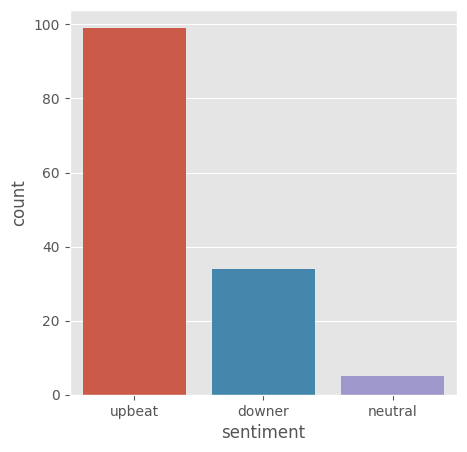

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=df)

In [200]:
lemmatizer = WordNetLemmatizer()
words = df["lyrics"].iloc[1]
print(lemmatizer.lemmatize(words))

suicide sally & johnny guitar lyricssuicide sally and johnny guitar she overdosed and crashed in her car amphetamine jab, shot a hole in his head ran out of veins, ran out of friends alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright gearhead candy is a natural queen bed motorcycle, you know what i mean she got her wings, giving head to a priest the fucker choked on his rosary beads alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright  stone cold sally is a stubbled whore her face is plastic, so is her soul she hates her body she is a he striptease and pre-teased, feeling diseased alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright hey rock`n`roll doctor rocknroll nurse gimme a shot gimme some pills i dont need a knife i d

In [201]:
df

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics,release_year,polarity,sentiment
0,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Keep Yourself Alive,keep yourself alive lyrics taking off i was to...,1973,0.182522,upbeat
1,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Doing Alright,suicide sally & johnny guitar lyricssuicide sa...,1973,-0.282500,downer
2,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Great King Rat,great king rat lyrics great king rat died tod...,1973,0.012355,upbeat
5,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,The Night Comes Down,the night comes down lyrics when i was young ...,1973,-0.041287,downer
8,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Jesus,jesus lyrics and then i saw him in the crowd a...,1973,0.000645,upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...
179,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Coming Soon,"coming soon lyrics uuuh, uuuh, uuuh oh, o-ooh,...",1980,-0.044444,downer
180,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Save Me,save me lyrics it started off so well they sai...,1980,0.189057,upbeat
183,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,Jealousy,"jealousy lyrics oh, how wrong can you be? oh, ...",1978,0.143298,upbeat
188,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,In Only Seven Days,in only seven days lyrics monday start of my h...,1978,0.114444,upbeat


### Export cleaned df for loading in DB

In [202]:
df.to_csv("data/cleaned-lyrics-queen.csv", index=False)